## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [35]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [36]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [37]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [38]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min()) / (x.max() - x.min()) * 2 - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [39]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [40]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [41]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [42]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [43]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.7446 - accuracy: 0.3855 - val_loss: 1.5502 - val_accuracy: 0.4568
Epoch 2/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.4957 - accuracy: 0.4730 - val_loss: 1.4710 - val_accuracy: 0.4817
Epoch 3/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.3750 - accuracy: 0.5175 - val_loss: 1.4262 - val_accuracy: 0.4976
Epoch 4/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.2742 - accuracy: 0.5529 - val_loss: 1.3764 - val_accuracy: 0.5158
Epoch 5/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.1916 - accuracy: 0.5817 - val_loss: 1.3660 - val_accuracy: 0.5223
Epoch 6/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.1069 - accuracy: 0.6117 - val_loss: 1.3898 - val_accuracy: 0.5220
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 119us/step - loss: 0.0878 - accuracy: 0.9705 - val_loss: 4.0212 - val_accuracy: 0.5351
Epoch 56/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.0907 - accuracy: 0.9698 - val_loss: 4.0243 - val_accuracy: 0.5256
Epoch 57/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.1064 - accuracy: 0.9647 - val_loss: 3.9688 - val_accuracy: 0.5283
Epoch 58/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.1021 - accuracy: 0.9665 - val_loss: 3.9846 - val_accuracy: 0.5315
Epoch 59/100
50000/50000 [==============================] - 6s 130us/step - loss: 0.1122 - accuracy: 0.9637 - val_loss: 3.9126 - val_accuracy: 0.5215
Epoch 60/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.0868 - accuracy: 0.9716 - val_loss: 4.0956 - val_accuracy: 0.5225
Epoch 61/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.0808 - accuracy: 0.9733 - val

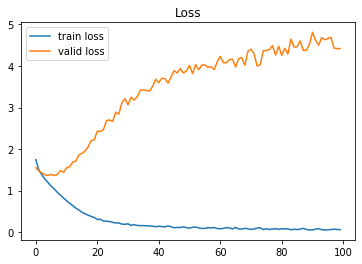

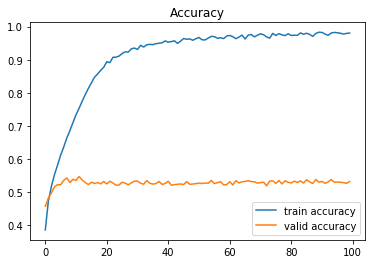

In [45]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()